# Optical VHR image, from pre-processing to GIS

## Pre-processing of VHR satellite images

### Atmospheric corrections

**Summary** 

This exercise allows to get familiar with radiometric and geometric corrections using OTB
applications.

**Prerequisites**

* Basic knowledge of remote sensing imagery
* Basic knowledge on how to use OTB applications

**Goal**

* **Know how to perform optical calibration**

  * Allow to compare and validate values between images and sensors (multi-temp) and multi-sensors
  * Convert DN into TOA (Top of Atmosphere) reflectance and TOC (Top of Canopy)

* **Know how to perform image fusion (pan-sharpening)**

  * Pan (higher spatial resolution) and XS (higher spectral resolution)
  * Test several fusion methods
  * Special modes available for PHR Pleiades image fusion (Pléiades mode)
  * See effects of image fusion (moving objects, radiometric calibration)

* **Know how to perform orthorectification**

  * Spatially locate satellite images
  * Associate geographical coordinates to pixel positions
  * Know prerequisites; bias, approximations

Compute TOA reflectance:


In [266]:
!otbcli_OpticalCalibration \
    -in WorkshopData/preprocessing/phr_xs_osr_mipy.tif \
    -out phr_xs_osr_mipy_toa.tif uint16 \
    -level toa \
    -milli 1

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
2022-06-23 08:52:17 (INFO): Loading kwl metadata from attached geom file WorkshopData/preprocessing/phr_xs_osr_mipy.geom
2022-06-23 08:52:17 (INFO): 
File:

In [282]:
!otbcli_OpticalCalibration -in WorkshopData/preprocessing/phr_pan_osr_mipy.tif \
    -out phr_pan_osr_mipy_toa.tif uint16 \
    -level toa \
    -milli 1

2022-06-23 09:34:00 (INFO): Loading kwl metadata from attached geom file WorkshopData/preprocessing/phr_pan_osr_mipy.geom
2022-06-23 09:34:00 (INFO): 
File: WorkshopData/preprocessing/phr_pan_osr_mipy.tif
Sensor detected: PHR 1A
Parameters extract from input image: 
	Acquisition Day: 15
	Acquisition Month: 11
	Acquisition Year: 2012
	Acquisition Sun Elevation Angle: 27.426
	Acquisition Sun Azimuth Angle: 170.624
	Acquisition Viewing Elevation Angle: 74.4169
	Acquisition Viewing Azimuth Angle: 246.899
	Acquisition gain (per band): 11.73 
	Acquisition bias (per band): 0 
	Solar Irradiance (per band): 1548 

2022-06-23 09:34:00 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:34:00 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 09:34:00 (INFO): OTB will use at most 8 threads
2022-06-23 09:34:00 (INFO): Compute Top of Atmosphere reflectance
2022-06-23 09:34:00 (INFO): Clamp values between [0, 100]
2022-06-23 09:34:00 (INFO): Use milli-reflectance
2022-06-23 09:34:00 (INFO):

phr_pan_osr_mipy_toa.tif


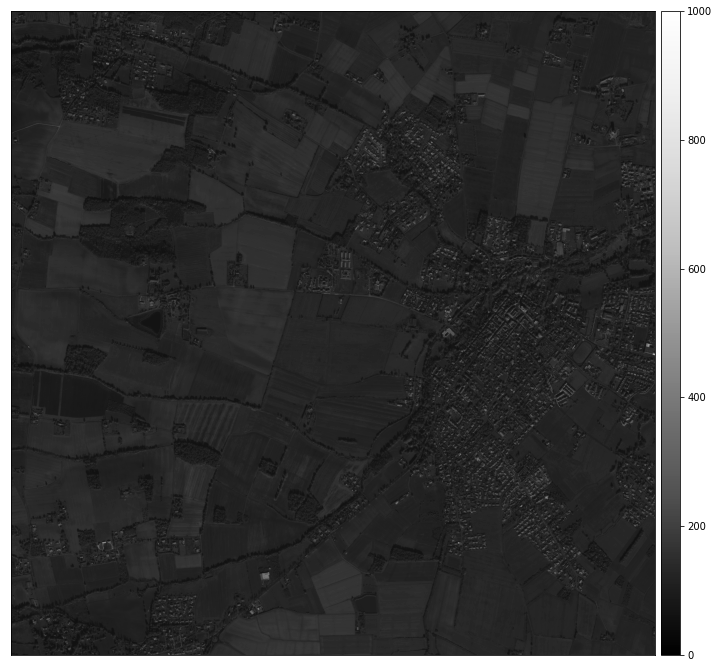

phr_xs_osr_mipy_toa.tif


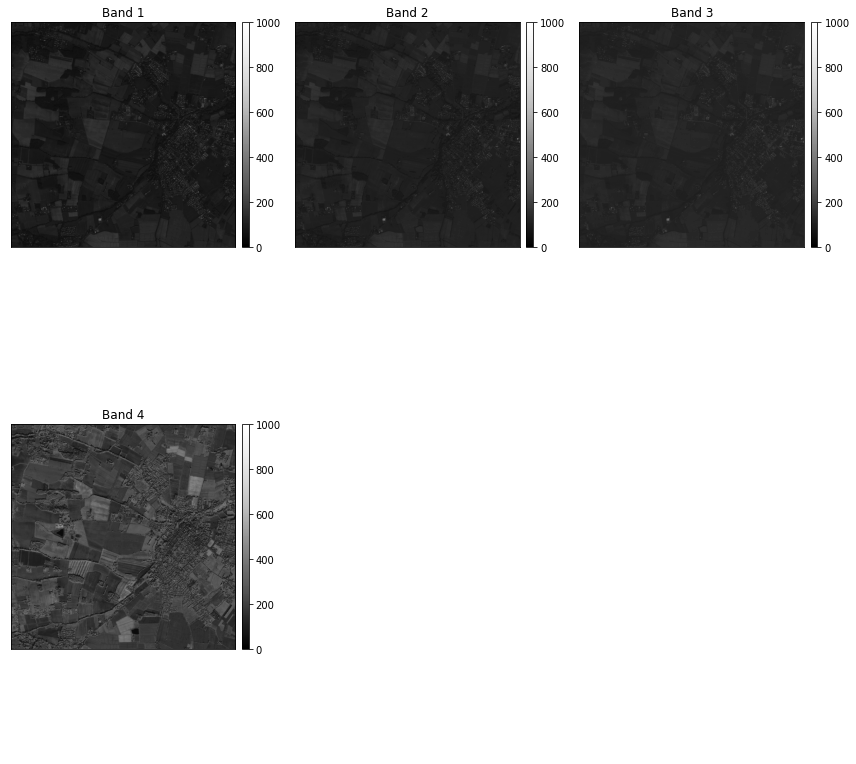

In [283]:
import numpy as np
import earthpy.plot as ep
import os
import rasterio
from rasterio.plot import show

#train_tiffs = os.listdir("./")

train_tiffs = ['phr_pan_osr_mipy_toa.tif','phr_xs_osr_mipy_toa.tif'] 
train_tiffs.sort()
for tiff in train_tiffs:
    if tiff.count("tif")>0:
        print(tiff)
        fp = r''+tiff
        raster = rasterio.open(fp)

        bands = []

        # Read the raster's bands to an array
        for i in range(raster.count):
            bands.append(raster.read((i+1), out_dtype=raster.dtypes[i]))

        # Convert to an iterable np.ndarray and plot in a 3-column grid
        ep.plot_bands(np.array(bands), cols=3) 

Compute TOC reflectance:

In [269]:
!otbcli_OpticalCalibration -in WorkshopData/preprocessing/phr_xs_osr_mipy.tif \
    -out phr_xs_osr_mipy_toc.tif uint16 \
    -level toc \
    -milli 1

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
2022-06-23 09:27:06 (INFO): Loading kwl metadata from attached geom file WorkshopData/preprocessing/phr_xs_osr_mipy.geom
2022-06-23 09:27:06 (INFO): 
File:

In [281]:
!otbcli_OpticalCalibration -in WorkshopData/preprocessing/phr_pan_osr_mipy.tif \
    -out phr_pan_osr_mipy_toc.tif uint16 \
    -level toc \
    -milli 1

2022-06-23 09:33:25 (INFO): Loading kwl metadata from attached geom file WorkshopData/preprocessing/phr_pan_osr_mipy.geom
2022-06-23 09:33:26 (INFO): 
File: WorkshopData/preprocessing/phr_pan_osr_mipy.tif
Sensor detected: PHR 1A
Parameters extract from input image: 
	Acquisition Day: 15
	Acquisition Month: 11
	Acquisition Year: 2012
	Acquisition Sun Elevation Angle: 27.426
	Acquisition Sun Azimuth Angle: 170.624
	Acquisition Viewing Elevation Angle: 74.4169
	Acquisition Viewing Azimuth Angle: 246.899
	Acquisition gain (per band): 11.73 
	Acquisition bias (per band): 0 
	Solar Irradiance (per band): 1548 

2022-06-23 09:33:26 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:33:26 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 09:33:26 (INFO): OTB will use at most 8 threads
2022-06-23 09:33:26 (INFO): Compute Top of Canopy reflectance
2022-06-23 09:33:26 (INFO): Atmospheric correction parameters compute by 6S : 
AtmosphericCorrectionParameters (0x5651af0f67c0)
  Atmospher

We can use the BandMathX application to compute image differences:

In [270]:
!otbcli_BandMathX -il phr_xs_osr_mipy_toa.tif phr_xs_osr_mipy_toc.tif \
    -out diff_xs_toa_toc.tif int16 \
    -exp "im1-im2"

2022-06-23 09:27:56 (INFO): Loading kwl metadata from attached geom file phr_xs_osr_mipy_toa.geom
2022-06-23 09:27:56 (INFO): Loading kwl metadata from attached geom file phr_xs_osr_mipy_toc.geom
2022-06-23 09:27:56 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:27:56 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 09:27:56 (INFO): OTB will use at most 8 threads
2022-06-23 09:27:56 (INFO): Image #1 has 4 components
2022-06-23 09:27:56 (INFO): Image #2 has 4 components
2022-06-23 09:27:56 (INFO): Using expression : im1-im2
2022-06-23 09:27:56 (INFO): Estimated memory for full processing: 244.064MB (avail.: 128 MB), optimal image partitioning: 2 blocks
2022-06-23 09:27:56 (INFO): File diff_xs_toa_toc.tif will be written in 3 blocks of 2000x667 pixels
Writing diff_xs_toa_toc.tif...: 32% [****************                                  ]2022-06-23 09:27:57 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (diff_xs_toa_toc.tif)
Writing

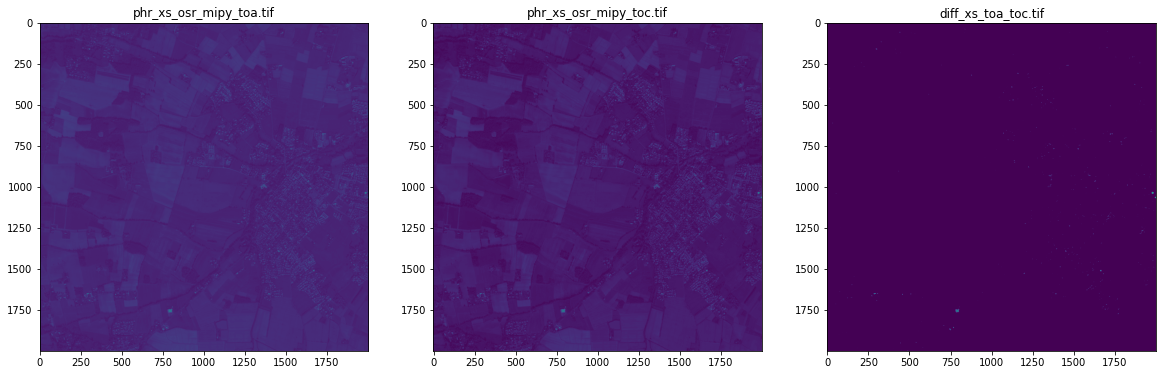

In [278]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 1
tiffs=["phr_xs_osr_mipy_toa.tif","phr_xs_osr_mipy_toc.tif","diff_xs_toa_toc.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

Then, for the panchromatic image:

In [284]:
!otbcli_BandMath -il phr_pan_osr_mipy_toa.tif phr_pan_osr_mipy_toc.tif \
    -out diff_pan_toa_toc.tif int16 \
    -exp "im1b1-im2b1"

2022-06-23 09:35:29 (INFO): Loading kwl metadata from attached geom file phr_pan_osr_mipy_toa.geom
2022-06-23 09:35:29 (INFO): Loading kwl metadata from attached geom file phr_pan_osr_mipy_toc.geom
2022-06-23 09:35:29 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:35:29 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 09:35:29 (INFO): OTB will use at most 8 threads
2022-06-23 09:35:29 (INFO): Image #1 has 1 components

2022-06-23 09:35:29 (INFO): Image #2 has 1 components

2022-06-23 09:35:29 (INFO): Estimated memory for full processing: 1464.82MB (avail.: 128 MB), optimal image partitioning: 12 blocks
2022-06-23 09:35:29 (INFO): File diff_pan_toa_toc.tif will be written in 13 blocks of 8000x616 pixels
Writing diff_pan_toa_toc.tif...: 6% [***                                               ]2022-06-23 09:35:29 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (diff_pan_toa_toc.tif)
Writing diff_pan_toa_toc.tif...: 100% [***************

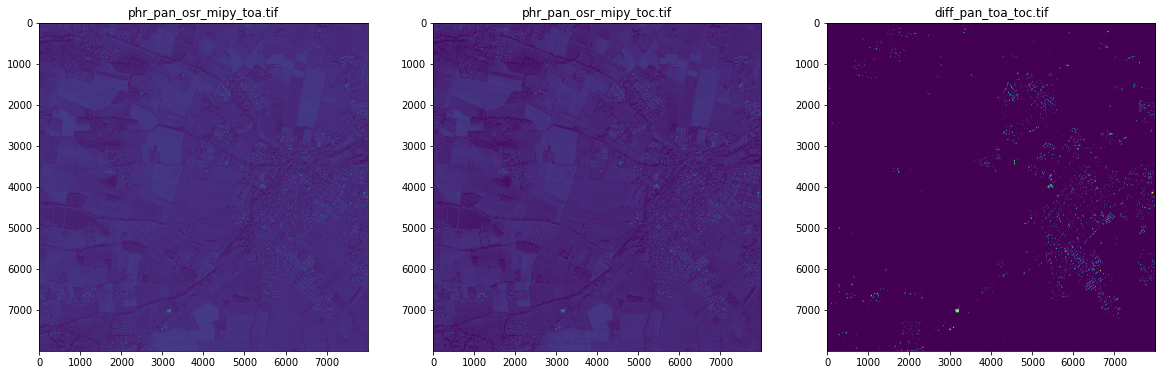

In [285]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 1
tiffs=["phr_pan_osr_mipy_toa.tif","phr_pan_osr_mipy_toc.tif","diff_pan_toa_toc.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

The blue band is more impacted by atmospheric effects. Indeed molecular diffusion on the signal is high in this spectral range (λ − 4 decay).

## P+XS Fusion

The goal of the exercise is to create a pan-sharpened image from the PAN and XS bundle.
Physical constraints on sensor and telescope design do not allow to have at the same time high spatial and
spectral resolutions. Indeed, the reduction of the sampling is accompanied by a decrease of the received
signal, so the SNR decreases. This is compensated by increasing the diameter of the entrance pupil or
by using specific detectors to charge accumulation (TDI) and also varying the width of the spectral band.
There is also a constraint on the amount of data that can be archived in the satellite memory. Finally, the
bandwidth of the downlink to send the image to the ground is also limited.
As a consequence most VHR sensors deliver 2 types of images:
* Multi-spectral (XS): separate spectral bands each on a spectral range (can overlap). For Pléiades, 4
bands (B,G,R,NIR) with a spatial resolution of 2.8m (resampled to 2m).
* Panchromatic (PAN): grey level image with a detector which covers a larger spectral range (for an
improved SNR) which allows to acquire images at 0.7m in the case of Pléiades (resampled to 0.5m).

We will perform pan-sharpening using TOA reflectance PAN and XS images ( phr_pan_osr_mipy_toa.tif
and phr_xs_osr_mipy_toa.tif)

1. Use the **BundleToPerfectSensor** application to superimpose and fuse the PAN and XS images. Note
that the application has a phr mode (Pléiades) which allows to perform image registration without
the need of sensor model parameters (default mode). Indeed, the PHR mode takes advantage of the
fact that Pléiades bundle are colocalised on the same grid.
2. Which fusion algorithm is used in the **BundleToPerfectSensor** application?
3. (optional) Use applications **Superimpose** and **Pansharpening** to perform pan-sharpening with other
fusion methods available in OTB.

In [287]:
!otbcli_BundleToPerfectSensor \
    -inp phr_pan_osr_mipy_toa.tif \
    -inxs phr_xs_osr_mipy_toa.tif \
    -mode phr \
    -out phr_pxs_osr_mipy.tif uint16

2022-06-23 09:40:21 (INFO): Loading kwl metadata from attached geom file phr_xs_osr_mipy_toa.geom
2022-06-23 09:40:21 (INFO): Loading kwl metadata from attached geom file phr_pan_osr_mipy_toa.geom
2022-06-23 09:40:21 (WARNING): Forcing PHR mode with PHR data. You need to add "-mode default" to force the default mode with PHR images.
2022-06-23 09:40:21 (WARNING): Forcing PHR mode with PHR data. You need to add "-mode default" to force the default mode with PHR images.
2022-06-23 09:40:21 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:40:21 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 09:40:21 (INFO): OTB will use at most 8 threads
2022-06-23 09:40:21 (INFO): Reproject XS onto Pan...
2022-06-23 09:40:21 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:40:21 (INFO): Using the PHR mode
2022-06-23 09:40:21 (INFO): Fusion of XS and Pan...
2022-06-23 09:40:21 (INFO): Simple RCS algorithm
2022-06-23 09:40:21 (INFO): Estimated m

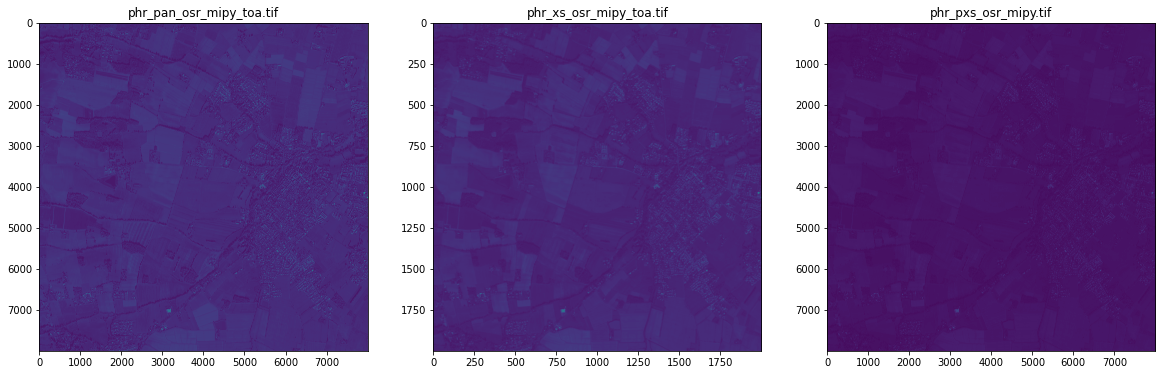

In [288]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 1
tiffs=["phr_pan_osr_mipy_toa.tif","phr_xs_osr_mipy_toa.tif","phr_pxs_osr_mipy.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

## Orthorectification

This operation allows to associate a ground coordinate (geographical position) to
every pixel in the image.
The schema below describes all steps that can be required to go from a set of Level 1 products to a
coregistered and colocalized image stack.


These steps can vary depending on the sensor and the product levels.

In the exercise we will only perform image orthorectification of the pan-sharpened product to discover
the modes available in OTB.

Use the Orthorectification application to perform the orthorectification:

1. Without Digital Elevation Model (DEM)
2. With a DEM (use the SRTM directory) and a geoid file (Geoid/egm96.grd)
3. Compare the 2 images in Monteverdi. What do you notice?
4. What is the projection system by default in the Orthorectification application?
5. In which UTM zone is located the Pleiades image?
6. Test different projection systems (WGS84, Lambert 93) and open the ortho image in QGIS.

### 1. Orthorectification without DEM:

In [289]:
!otbcli_OrthoRectification \
    -io.in phr_pxs_osr_mipy.tif \
    -io.out phr_orthopxs_osr_mipy.tif uint16

2022-06-23 09:43:32 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:43:32 (INFO): Loading kwl metadata from attached geom file phr_pxs_osr_mipy.geom
2022-06-23 09:43:32 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:43:32 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:43:32 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 09:43:32 (INFO): OTB will use at most 8 threads
2022-06-23 09:43:32 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:43:32 (INFO): Generating output with size = [8497, 8035]
2022-06-23 09:43:32 (INFO): Generating output with pixel spacing = [0.514511, -0.514511]
2022-06-23 09:43:32 (INFO): Generating output with origin = [349344, 4.82149e+06]
2022-06-23 09:43:32 (INFO): Area outside input image bounds will have a pixel value of [0, 0, 0, 0]
2022-06-23 09:43:32 (INFO): Using a deformation grid with a physical spaci

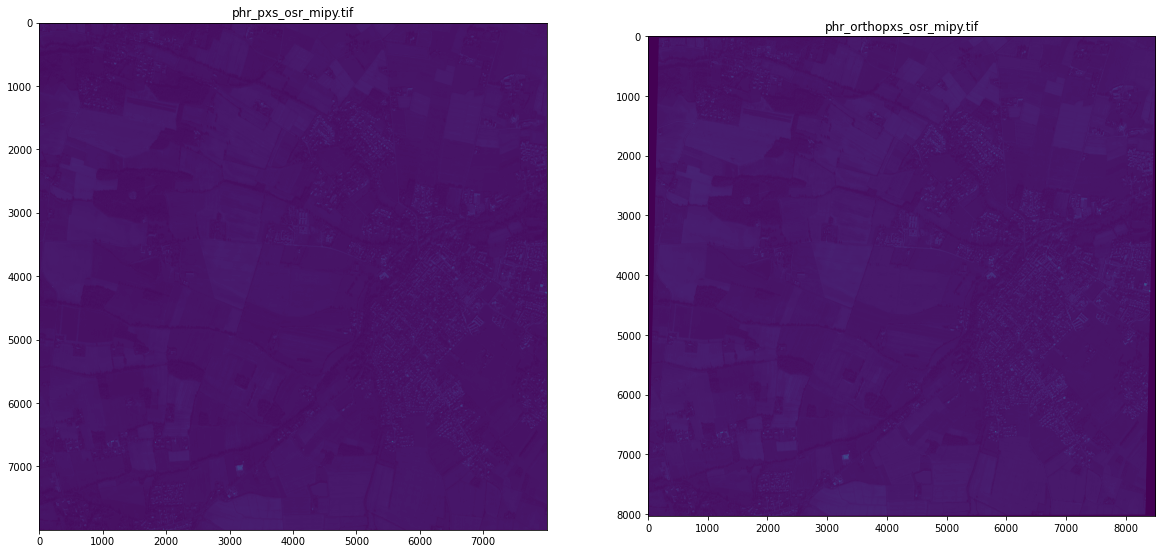

In [290]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["phr_pxs_osr_mipy.tif","phr_orthopxs_osr_mipy.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

### 2. Orthorectification with DEM and geoid:

In [291]:
!otbcli_OrthoRectification \
    -io.in phr_pxs_osr_mipy.tif \
    -io.out phr_orthopxs_osr_mipy.tif uint16 \
    -elev.dem WorkshopData/preprocessing/SRTM/ \
    -elev.geoid WorkshopData/preprocessing/Geoid/egm96.grd

2022-06-23 09:45:48 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:45:48 (INFO): Loading kwl metadata from attached geom file phr_pxs_osr_mipy.geom
2022-06-23 09:45:48 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:45:48 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:45:48 (INFO): Elevation management: using DEM directory (WorkshopData/preprocessing/SRTM/)
2022-06-23 09:45:48 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:45:48 (INFO): Elevation management: using geoid file (WorkshopData/preprocessing/Geoid/egm96.grd)
2022-06-23 09:45:48 (INFO): Elevation management: using DEM directory (WorkshopData/preprocessing/SRTM/)
2022-06-23 09:45:48 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:45:48 (INFO): GDAL maximum cache size is 1600 MB
2022-06-23 09:45:48 (INFO): OTB will use at most 8 t

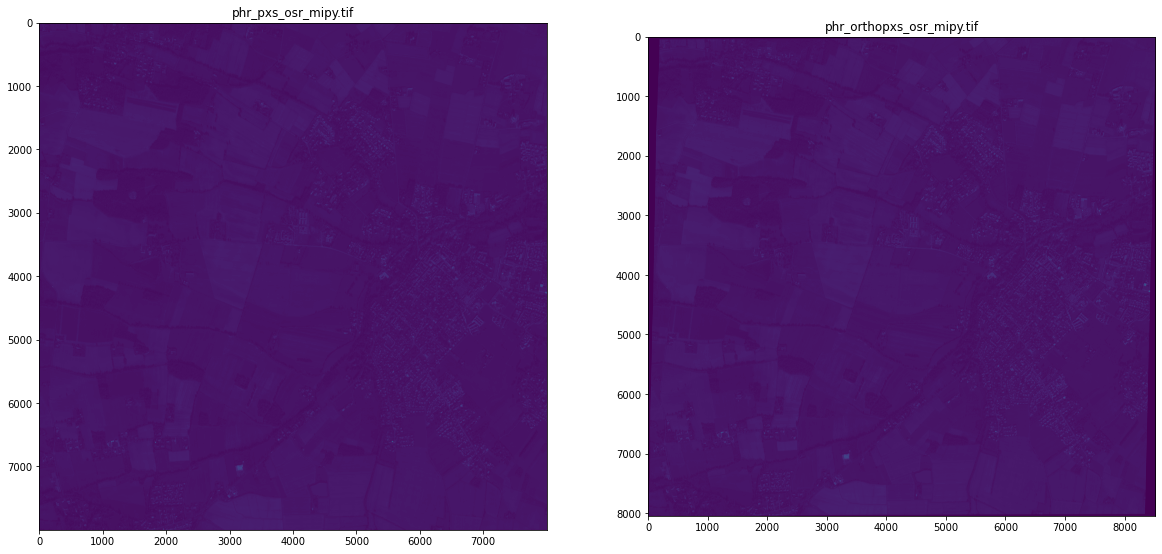

In [292]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["phr_pxs_osr_mipy.tif","phr_orthopxs_osr_mipy.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

### 3 Default projection is UTM. 

In our case the UTM zone is 32 North.

### 4 Orthorectification in WGS84 and in Lambert 93:

In [300]:
! otbcli_OrthoRectification \
    -io.in phr_pxs_osr_mipy.tif \
    -io.out phr_orthopxs_osr_mipy_wgs84.tif uint16 \
    -elev.dem WorkshopData/preprocessing/SRTM/ \
    -elev.geoid WorkshopData/preprocessing/Geoid/egm96.grd \
    -map epsg -map.epsg.code 4326

2022-06-23 09:49:32 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:32 (INFO): Loading kwl metadata from attached geom file phr_pxs_osr_mipy.geom
2022-06-23 09:49:32 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:32 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:32 (INFO): Output X ground spacing in meter = 0.374911
2022-06-23 09:49:32 (INFO): Output Y ground spacing in meter = 0.424175
2022-06-23 09:49:32 (INFO): 4 meters in X direction correspond roughly to 4.94422e-05 degrees
2022-06-23 09:49:32 (INFO): 4 meters in Y direction correspond roughly to -4.37e-05 degrees
2022-06-23 09:49:32 (INFO): Setting grid spacing to 4.37e-05
2022-06-23 09:49:32 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:32 (INFO): Output X ground spacing in meter = 0.374911
2022-06-23 09:49:32 (INFO): Output Y g

In [299]:
!otbcli_OrthoRectification \
    -io.in phr_pxs_osr_mipy.tif \
    -io.out phr_orthopxs_osr_mipy_lamb93.tif uint16 \
    -elev.dem WorkshopData/preprocessing/SRTM/ \
    -elev.geoid WorkshopData/preprocessing/Geoid/egm96.grd \
    -map lambert93

2022-06-23 09:49:09 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:09 (INFO): Loading kwl metadata from attached geom file phr_pxs_osr_mipy.geom
2022-06-23 09:49:09 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:09 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:09 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:09 (INFO): Elevation management: using DEM directory (WorkshopData/preprocessing/SRTM/)
2022-06-23 09:49:09 (INFO): Elevation management: setting default height above ellipsoid to 0 meters
2022-06-23 09:49:09 (INFO): Elevation management: using geoid file (WorkshopData/preprocessing/Geoid/egm96.grd)
2022-06-23 09:49:09 (INFO): Elevation management: using DEM directory (WorkshopData/preprocessing/SRTM/)
2022-06-23 09:49:09 (INFO): Default RAM limit for OTB is 128 MB
2022-06-23 09:

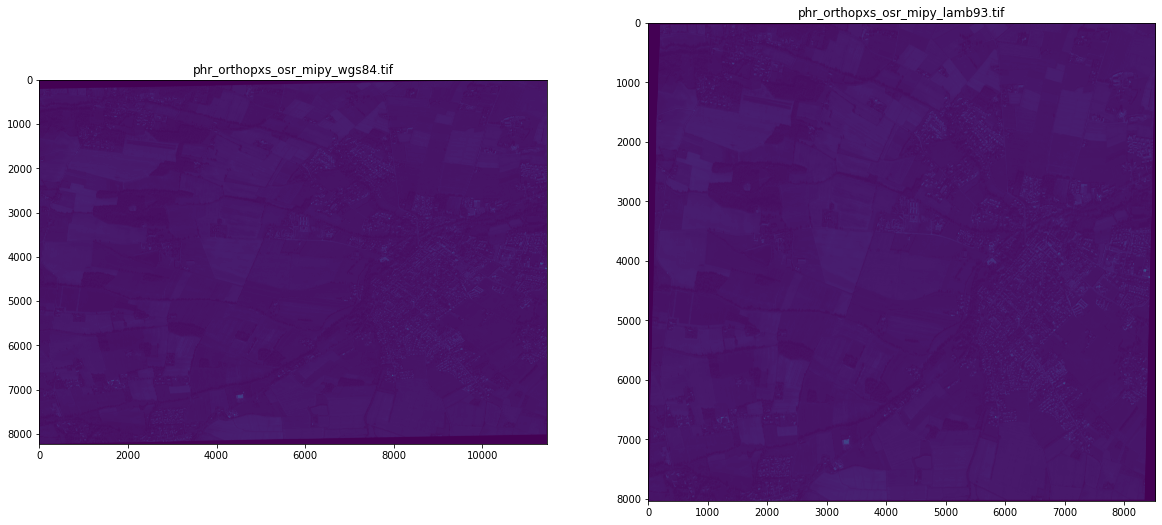

In [329]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["phr_orthopxs_osr_mipy_wgs84.tif","phr_orthopxs_osr_mipy_lamb93.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()